In [1]:
#Import the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', 20000)
out_put_path = r'../datasets/baseline/output/'

In [3]:
#Use os and sys to setup a relative path to the current working directory in order to make python modules import easier.
import os
import sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '..', 'utils'))

In [4]:
#functions is a module from the utils package. It gathers all the utility functions to perferm aggregation on columns.
from functions import *

In [5]:
students_df = pd.read_csv(out_put_path + 'students_clean.csv', encoding="utf-8")
s_df = students_df.copy()
s_df_f = s_df[s_df['Sex']=='Female']
s_df_m = s_df[s_df['Sex']=='Male']

fishers_df = pd.read_csv(out_put_path + 'fihsers_clean.csv', encoding="utf-8")
fi_df = fishers_df.copy()
fi_df_f = fi_df[fi_df['Sex']=='Female']
fi_df_m = fi_df[fi_df['Sex']=='Male']

farmers_df = pd.read_csv(out_put_path + 'farmers_clean.csv', encoding="utf-8")
fa_df = farmers_df.copy()

fa_df_f = fa_df[fa_df['Sex']=='Female']
fa_df_m = fa_df[fa_df['Sex']=='Male']

In [6]:
print(students_df.shape)
print(s_df_f.shape)
print(s_df_m.shape)

(157, 32)
(92, 32)
(65, 32)


In [7]:
#fa_df_f.head(21)

In [8]:
print(fishers_df.shape)
print(fi_df_f.shape)
print(fi_df_m.shape)

(44, 28)
(2, 28)
(42, 28)


In [9]:
print(farmers_df.shape)
print(fa_df_f.shape)
print(fa_df_m.shape)

(111, 34)
(21, 34)
(89, 34)


In [10]:
s_ages_df_m = count_freq_simple_answer(s_df_m, 'Age interval')
s_ages_df_f = count_freq_simple_answer(s_df_f, 'Age interval')
s_ages_df = None

if s_ages_df_m.shape[0] >= s_ages_df_f.shape[0]:  
    s_ages_df = merge_match_size(s_ages_df_m, s_ages_df_f, 'response').sort_values(by='response')
    s_men_ages_values = list(s_ages_df["frequency_x"])
    s_women_ages_values = list(s_ages_df["frequency_y"])
else:
    s_ages_df = merge_match_size(s_ages_df_f, s_ages_df_m, 'response').sort_values(by='response')
    s_women_ages_values = list(s_ages_df["frequency_x"])
    s_men_ages_values = list(s_ages_df["frequency_y"])
    
s_ages_interval = list(s_ages_df["response"])

In [11]:
s_ages_df

,response,frequency_x,frequency_y
2,From 12 to 15,20,35
1,From 15 to 20,33,34
3,Greater than 20,4,4
0,Less than 12,8,19


In [12]:
fi_ages_df_m = count_freq_simple_answer(fi_df_m, 'Age interval')
fi_ages_df_f = count_freq_simple_answer(fi_df_f, 'Age interval')
fi_ages_df = None

if fi_ages_df_m.shape[0] >= fi_ages_df_f.shape[0]:  
    fi_ages_df = merge_match_size(fi_ages_df_m, fi_ages_df_f, 'response').sort_values(by='response')
    fi_men_ages_values = list(fi_ages_df["frequency_x"])
    fi_women_ages_values = list(fi_ages_df["frequency_y"])
else:
    fi_ages_df = merge_match_size(fi_ages_df_f, fi_ages_df_m, 'response').sort_values(by='response')
    fi_women_ages_values = list(fi_ages_df["frequency_x"])
    fi_men_ages_values = list(fi_ages_df["frequency_y"])
    
fi_ages_interval = list(fi_ages_df["response"])

In [13]:
fi_ages_df

,response,frequency_x,frequency_y
3,From 25 to 35,8,1.0
1,From 35 to 25,19,1.0
0,Greater than 55,13,0.0
2,Less than 25,2,0.0


In [14]:
fa_ages_df_m = count_freq_simple_answer(fa_df_m, 'Age interval')
fa_ages_df_f = count_freq_simple_answer(fa_df_f, 'Age interval')
fa_ages_df = None

if fa_ages_df_m.shape[0] >= fa_ages_df_f.shape[0]:  
    fa_ages_df = merge_match_size(fa_ages_df_m, fa_ages_df_f, 'response').sort_values(by='response')
    fa_men_ages_values = list(fa_ages_df["frequency_x"])
    fa_women_ages_values = list(fa_ages_df["frequency_y"])
else:
    fa_ages_df = merge_match_size(fa_ages_df_f, fa_ages_df_m, 'response').sort_values(by='response')
    fa_women_ages_values = list(fa_ages_df["frequency_x"])
    fa_men_ages_values = list(fa_ages_df["frequency_y"])
    
fa_ages_interval = list(fa_ages_df["response"])

In [15]:
fa_ages_df

,response,frequency_x,frequency_y
1,From 25 to 35,18,5.0
0,From 35 to 25,49,10.0
2,Greater than 55,19,6.0
3,Less than 25,3,0.0


In [16]:
sns.set(rc={'figure.figsize':(16,4)})
sns.set_context('paper')

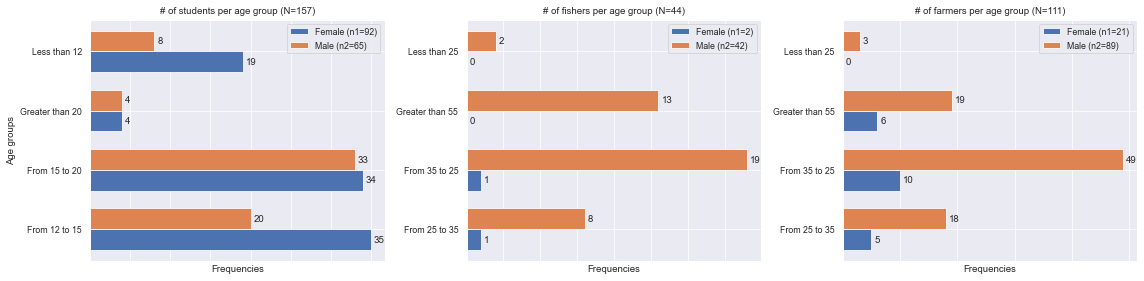

In [17]:
# Fixing random state for reproducibility

fig, ax = plt.subplots(1, 3, sharey=False)
width = 0.35

ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

#Plot Students
s_y_pos = np.arange(len(s_ages_interval))
s_rects_f = ax1.barh(s_y_pos - width/2, s_women_ages_values, width, align='center', label=f'Female (n1=%s)' % s_df_f.shape[0])
s_rects_m = ax1.barh(s_y_pos + width/2, s_men_ages_values, width, align='center', label=f'Male (n2=%s)' % s_df_m.shape[0])
ax1.legend()
ax1.set_yticks(s_y_pos)
ax1.set_yticklabels(s_ages_interval)
ax1.set_title('# of students per age group (N=%s)' % s_df.shape[0])
ax1.set_ylabel('Age groups')
ax1.set_xlabel('Frequencies')
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


#Plot Fishers
fi_y_pos = np.arange(len(fi_ages_interval))
fi_rects_f = ax2.barh(fi_y_pos - width/2, fi_women_ages_values, width, align='center', label=f'Female (n1=%s)' % fi_df_f.shape[0])
fi_rects_m = ax2.barh(fi_y_pos + width/2, fi_men_ages_values, width, align='center', label=f'Male (n2=%s)' % fi_df_m.shape[0])
ax2.legend()
ax2.set_yticks(fi_y_pos)
ax2.set_yticklabels(fi_ages_interval)
ax2.set_title('# of fishers per age group (N=%s)' % fi_df.shape[0])
#ax2.set_ylabel('Age groups')
ax2.set_xlabel('Frequencies')
ax2.bar_label(fi_rects_f, padding=3)
ax2.bar_label(fi_rects_m, padding=3)
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)



#Plot Fishers
fa_y_pos = np.arange(len(fa_ages_interval))
fa_rects_f = ax3.barh(fa_y_pos - width/2, fa_women_ages_values, width, align='center', label=f'Female (n1=%s)' % fa_df_f.shape[0])
fa_rects_m = ax3.barh(fa_y_pos + width/2, fa_men_ages_values, width, align='center', label=f'Male (n2=%s)' % fa_df_m.shape[0])
ax3.legend()
ax3.set_yticks(fa_y_pos)
ax3.set_yticklabels(fa_ages_interval)
ax3.set_title('# of farmers per age group (N=%s)' % fa_df.shape[0])
#ax2.set_ylabel('Age groups')
ax3.set_xlabel('Frequencies')
ax3.bar_label(fa_rects_f, padding=3)
ax3.bar_label(fa_rects_m, padding=3)
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


fig.tight_layout()
plt.show()

In [18]:
n = [ 8, 8, 9, 9]

In [19]:
for i, v in enumerate(n):
    print(i)

0
1
2
3


In [20]:
l = [2, 5]

names = ['To', 'Ta', 'Pee', 'Pow']

list(zip(l, names))

[(2, 'To'), (5, 'Ta')]